# Import Libraries / Package

In [2]:
# Library / Package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

Import library dalam regresi linear berguna untuk mempermudah proses analisis dan pembuatan model yang efektif.

# Load Dataset

In [3]:
student = pd.read_csv('/content/Student_Performance.csv')
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Membaca dataset yang akan digunakan untuk regresi analysis. Dataset ini berisi data tentang performa akademik siswa berdasarkan beberapa faktor, mencakup variabel seperti jumlah jam belajar, skor sebelumnya, partisipasi dalam kegiatan ekstrakurikuler, jumlah jam tidur, dan frekuensi berlatih soal.

# Exploratory Data Analysis (EDA) & Data Preprocessing

Tipe Data

In [4]:
# Informasi data
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Menggali informasi dari dataset student performance. Diketahui terdapat 10000 baris dengan 6 kolom dalam data. Tipe data dalam dataset ini juga beragam, seperti integer, obejct, dan float. Memory usage dari data ini sebesar 468.9KB.

In [5]:
# Analisis secara deskriptif
student.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


Mengecek nilai statistika deskriptif dari data seperti nilai mean, standar deviasi, minimum, maximum, Q1, Q2, dan Q3.

Missing Value

In [6]:
# Cek apakah terdapat missing value
student.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


Sebelum melakukan analisis regresi, dilakukan pengecekan data terlebih dahulu apakah ada data yang hilang (missing value) atau tidak agar hasil analisis yang didapatkan bisa lebih sesuai dengan dataset.

Duplicates Data

In [7]:
# Cek apakah terdapat data yang duplikat
duplikat = student[student.duplicated()]
duplikat

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [8]:
student.drop_duplicates(inplace=True)

In [9]:
student.shape

(9873, 6)

Selain melakukan pengecekan data yang hilang (missing value), perlu dilakukan pengecekan data duplikat juga. Dalam kasus ini, terdapat beberapa data yang duplikat. Sehingga dilakukan penanganan berupa drop duplicates (menghapus data duplikat) agar data menjadi lebih sesuai.

# Encoding Data

In [10]:
kategorikal = student.select_dtypes(include='object').columns
kategorikal

Index(['Extracurricular Activities'], dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in kategorikal: #untuk data categorical
    student[i] = le.fit_transform(student[i])

In [12]:
student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   int64  
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 539.9 KB


Encoding data ini diperlukan untuk mengubah data berkategori `object` (kolom `Extracurricular Activities`) menjadi integer agar dapat diproses dan dipahami model dengan benar.

# Asumsi Analisis Regresi

Uji Normalitas

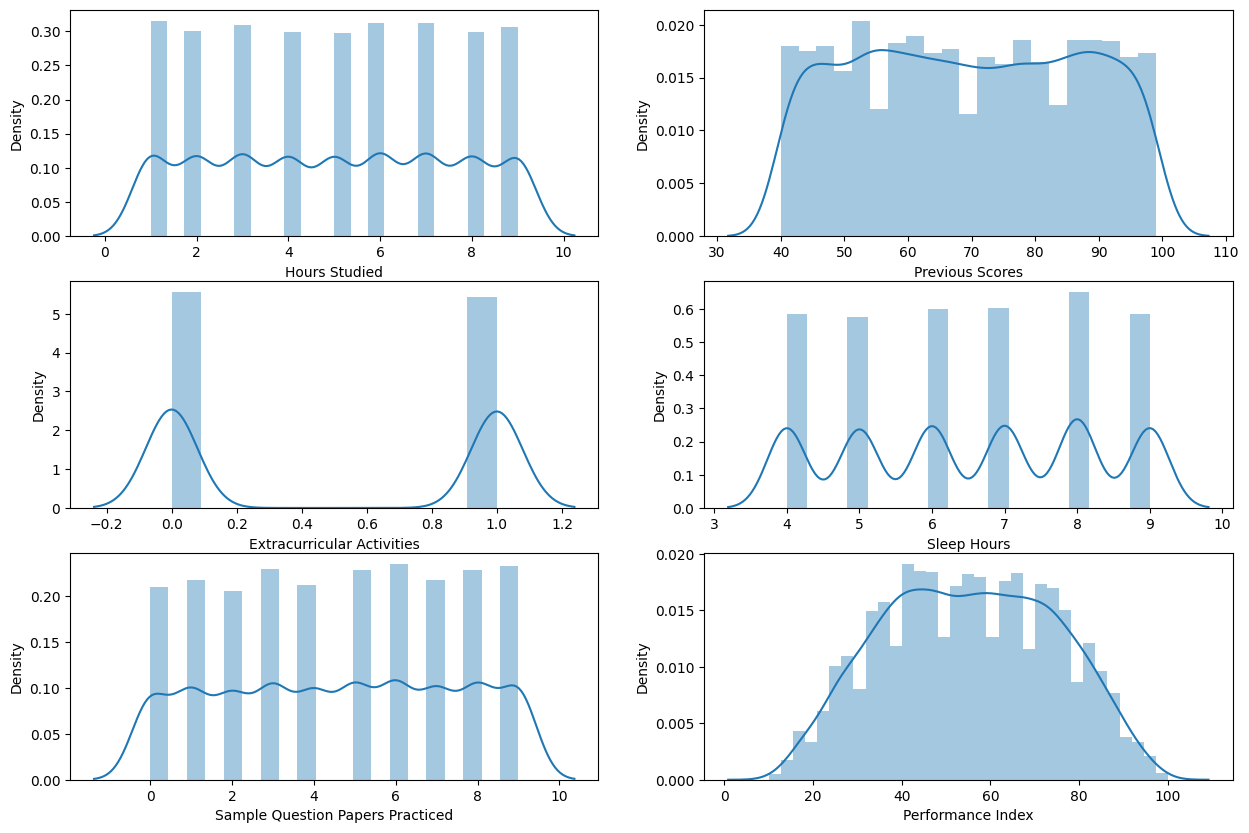

In [13]:
# Cek normalitas data menggunakan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

sns.distplot(student["Hours Studied"], ax=axes[0, 0])
sns.distplot(student["Previous Scores"], ax=axes[0, 1])
sns.distplot(student["Extracurricular Activities"], ax=axes[1, 0])
sns.distplot(student["Sleep Hours"], ax=axes[1, 1])
sns.distplot(student["Sample Question Papers Practiced"], ax=axes[2, 0])
sns.distplot(student["Performance Index"], ax=axes[2, 1])
plt.show()

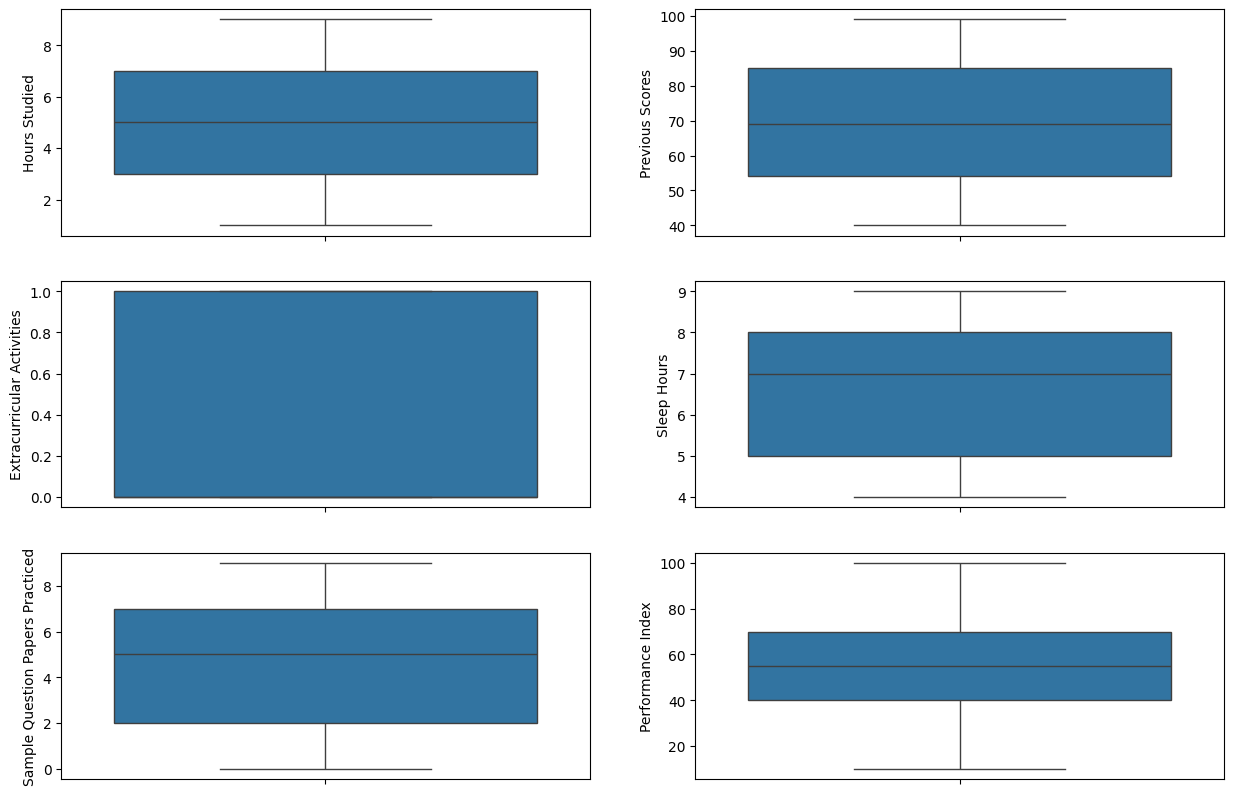

In [14]:
# Cek normalitas data menggunakan boxplot
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

sns.boxplot(student["Hours Studied"], ax=axes[0, 0])
sns.boxplot(student["Previous Scores"], ax=axes[0, 1])
sns.boxplot(student["Extracurricular Activities"], ax=axes[1, 0])
sns.boxplot(student["Sleep Hours"], ax=axes[1, 1])
sns.boxplot(student["Sample Question Papers Practiced"], ax=axes[2, 0])
sns.boxplot(student["Performance Index"], ax=axes[2, 1])
plt.show()

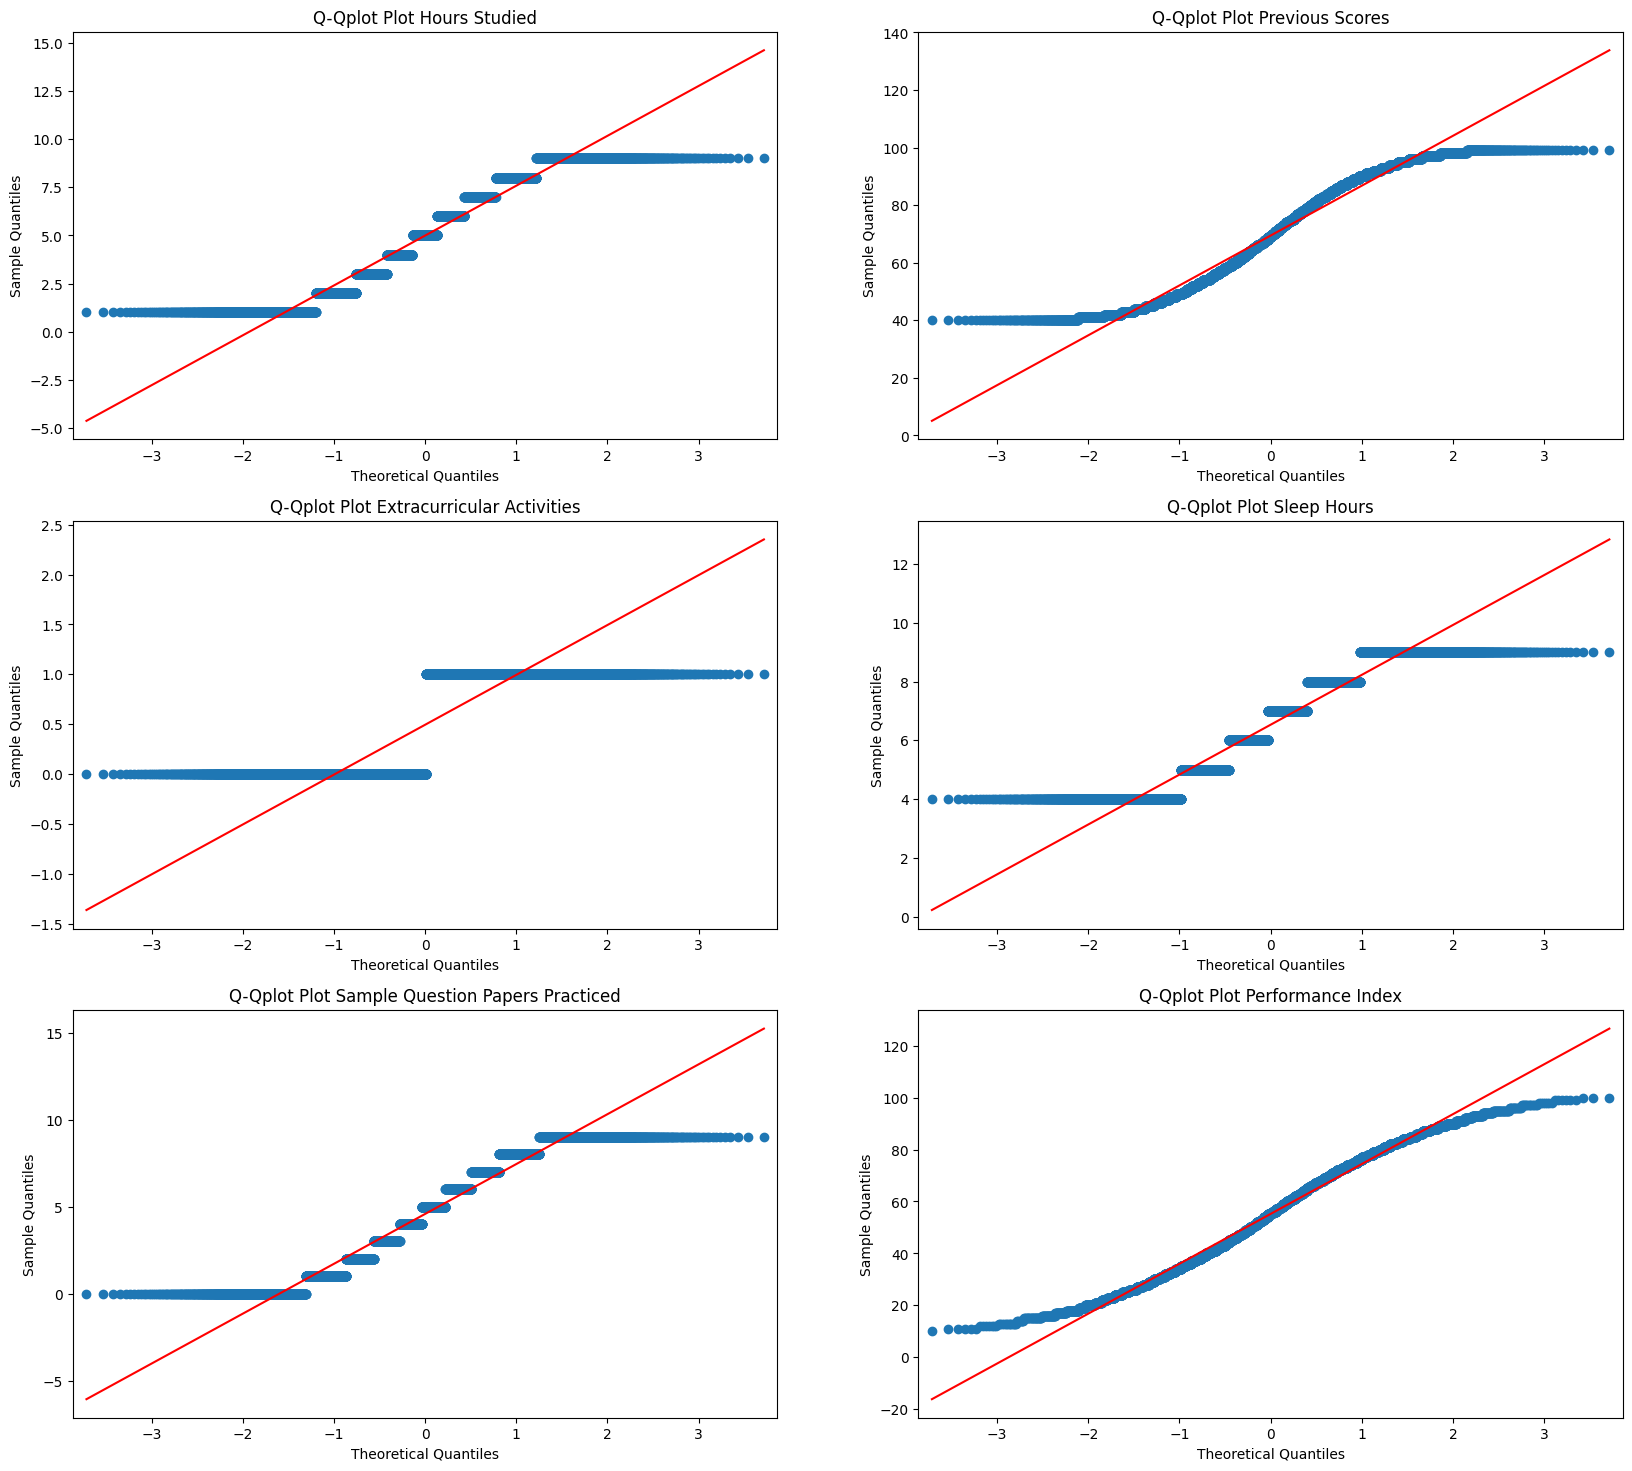

In [15]:
# Cek normalitas data menggunakan Q-Q plot
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

sm.graphics.qqplot(student["Hours Studied"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot Hours Studied')

sm.graphics.qqplot(student["Previous Scores"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot Previous Scores')

sm.graphics.qqplot(student["Extracurricular Activities"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot Extracurricular Activities')

sm.graphics.qqplot(student["Sleep Hours"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot Sleep Hours')

sm.graphics.qqplot(student["Sample Question Papers Practiced"].dropna(), line='s', ax=axes[2, 0])
axes[2, 0].title.set_text('Q-Qplot Plot Sample Question Papers Practiced')

sm.graphics.qqplot(student["Performance Index"].dropna(), line='s', ax=axes[2, 1])
axes[2, 1].title.set_text('Q-Qplot Plot Performance Index')

plt.show()

In [16]:
# Cek Normalitas menggunakan Uji Shapiro-Wilk
column = student.columns

for i in column:
  stat, p = shapiro(student[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.931, p=0.000
Tolak H0, Hours Studied tidak berdistribusi normal
Statistics=0.953, p=0.000
Tolak H0, Previous Scores tidak berdistribusi normal
Statistics=0.637, p=0.000
Tolak H0, Extracurricular Activities tidak berdistribusi normal
Statistics=0.908, p=0.000
Tolak H0, Sleep Hours tidak berdistribusi normal
Statistics=0.936, p=0.000
Tolak H0, Sample Question Papers Practiced tidak berdistribusi normal
Statistics=0.984, p=0.000
Tolak H0, Performance Index tidak berdistribusi normal


Uji normalitas digunakan dalam analisis regresi untuk memeriksa apakah data residual (error) mengikuti distribusi normal. Uji normalitas penting dilakukan karena salah satu asumsi utama dalam regresi linear klasik adalah bahwa residual (selisih antara nilai yang diprediksi dan nilai aktual) harus berdistribusi normal.

Uji Linearitas

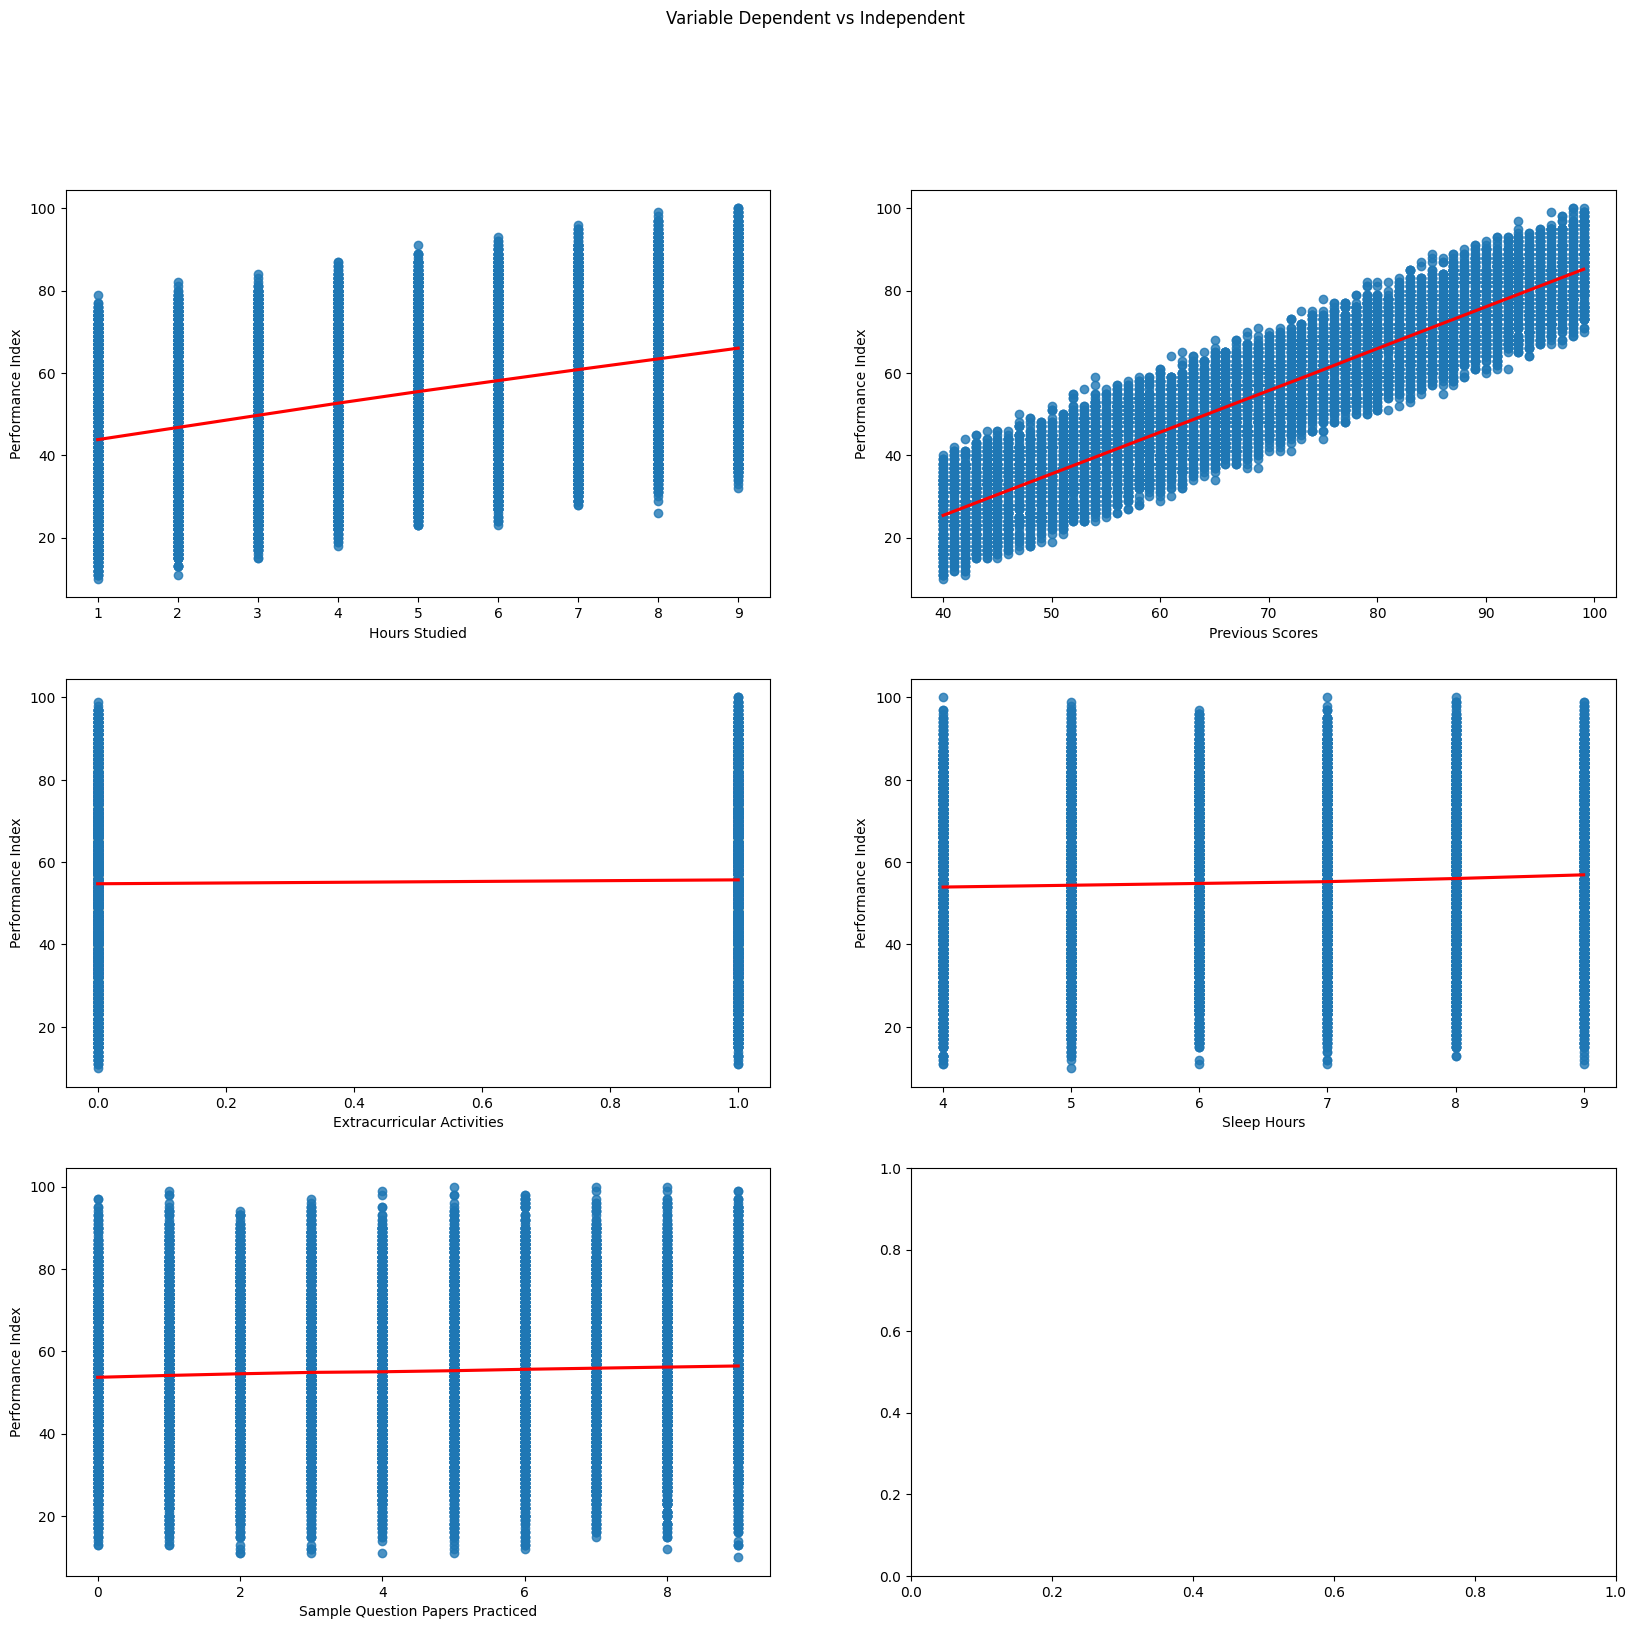

In [17]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=student["Hours Studied"], y=student["Performance Index"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 0])
sns.regplot(x=student["Previous Scores"], y=student["Performance Index"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 1])
sns.regplot(x=student["Extracurricular Activities"], y=student["Performance Index"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 0])
sns.regplot(x=student["Sleep Hours"], y=student["Performance Index"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 1])
sns.regplot(x=student["Sample Question Papers Practiced"], y=student["Performance Index"], lowess=True, line_kws={'color': 'red'}, ax=axes[2, 0])
plt.show()

Uji linearitas dalam analisis regresi digunakan untuk memeriksa apakah hubungan antara variabel independen (prediktor) dan variabel dependen (respons) bersifat linear atau tidak. Linearitas adalah asumsi penting dalam model regresi linear karena model ini mengasumsikan bahwa ada hubungan linear antara prediktor dan respons.

Uji Multikolinearitas

<Axes: >

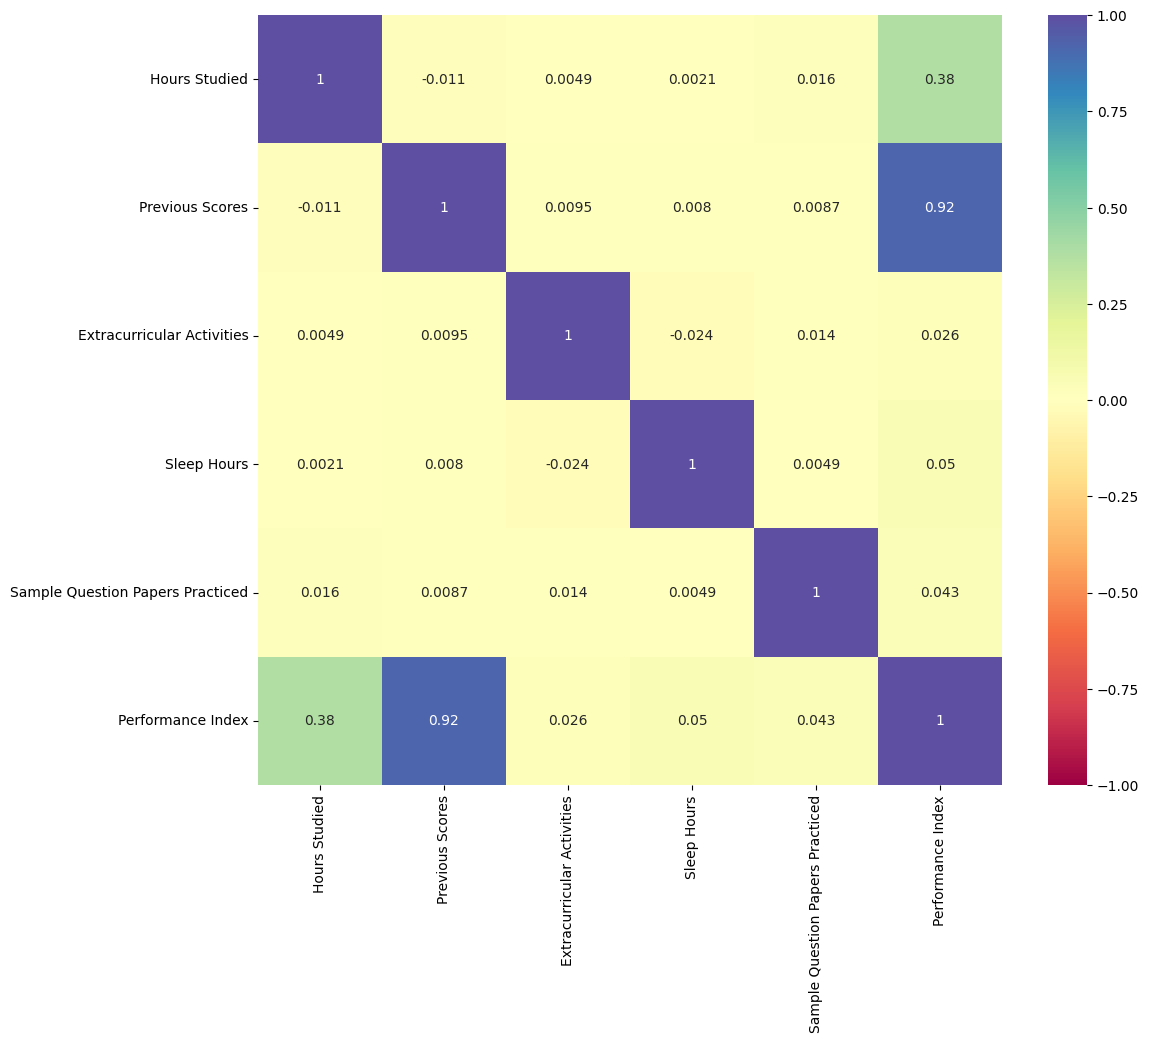

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(student.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [19]:
# Cek urutan korelasi dari terendah ke tertinggi
korelasi = student.corr()["Performance Index"].sort_values()
korelasi

,Performance Index
Extracurricular Activities,0.026075
Sample Question Papers Practiced,0.043436
Sleep Hours,0.050352
Hours Studied,0.375332
Previous Scores,0.915135
Performance Index,1.000000


Uji multikolinearitas digunakan dalam analisis regresi untuk mendeteksi adanya hubungan linear yang sangat kuat antar variabel independen (prediktor) dalam model. Multikolinearitas terjadi ketika dua atau lebih variabel independen saling berkorelasi tinggi, yang dapat menyebabkan beberapa masalah serius dalam analisis regresi.

Korelasi antara Variabel:
- Previous Scores dan Performance Index memiliki korelasi yang sangat tinggi (0,92). Ini menunjukkan bahwa ada hubungan positif yang sangat kuat antara skor sebelumnya dengan indeks performa siswa, sehingga skor sebelumnya kemungkinan besar sangat mempengaruhi kinerja siswa.
- Hours Studied dan Performance Index memiliki korelasi positif moderat sekitar 0,38, yang berarti jumlah jam belajar memiliki hubungan yang cukup signifikan tetapi tidak terlalu kuat dengan performa siswa.
- Variabel lain, seperti Extracurricular Activities, Sleep Hours, dan Sample Question Papers Practiced, menunjukkan korelasi yang lemah atau sangat rendah dengan Performance Index (nilai korelasi dekat dengan 0).

Kesimpulan: Variabel yang paling berpengaruh terhadap Performance Index adalah Previous Scores, diikuti oleh Hours Studied.

# Scaling

In [20]:
# Scale data
scaler = StandardScaler()
scaled_student = scaler.fit_transform(student)
scaled_student

array([[ 0.77556551,  1.7061685 ,  1.01007813,  1.45402483, -1.24971491,
         1.86297891],
       [-0.38320542,  0.72491187, -0.99002243, -1.49131517, -0.90092522,
         0.50934786],
       [ 1.16182248, -1.06443844,  1.01007813,  0.27588883, -0.90092522,
        -0.53190679],
       ...,
       [ 0.38930853,  0.78263285,  1.01007813,  0.86495683,  0.14544385,
         0.97791245],
       [ 1.54807946,  1.59072654,  1.01007813,  0.27588883, -1.59850461,
         2.07122984],
       [ 0.77556551,  0.26314405, -0.99002243,  0.86495683, -1.24971491,
         0.45728513]])

In [21]:
# Membuat dataframe dari hasil scalling
scaled_student = pd.DataFrame(scaled_student, columns=student.columns)
scaled_student

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775566,1.706168,1.010078,1.454025,-1.249715,1.862979
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925,0.509348
2,1.161822,-1.064438,1.010078,0.275889,-0.900925,-0.531907
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925,-1.000471
4,0.775566,0.320865,-0.990022,0.864957,0.145444,0.561411
...,...,...,...,...,...,...
9868,-1.541976,-1.179880,1.010078,-1.491315,-0.900925,-1.677287
9869,0.775566,-0.314066,1.010078,0.864957,0.145444,0.144909
9870,0.389309,0.782633,1.010078,0.864957,0.145444,0.977912
9871,1.548079,1.590727,1.010078,0.275889,-1.598505,2.071230


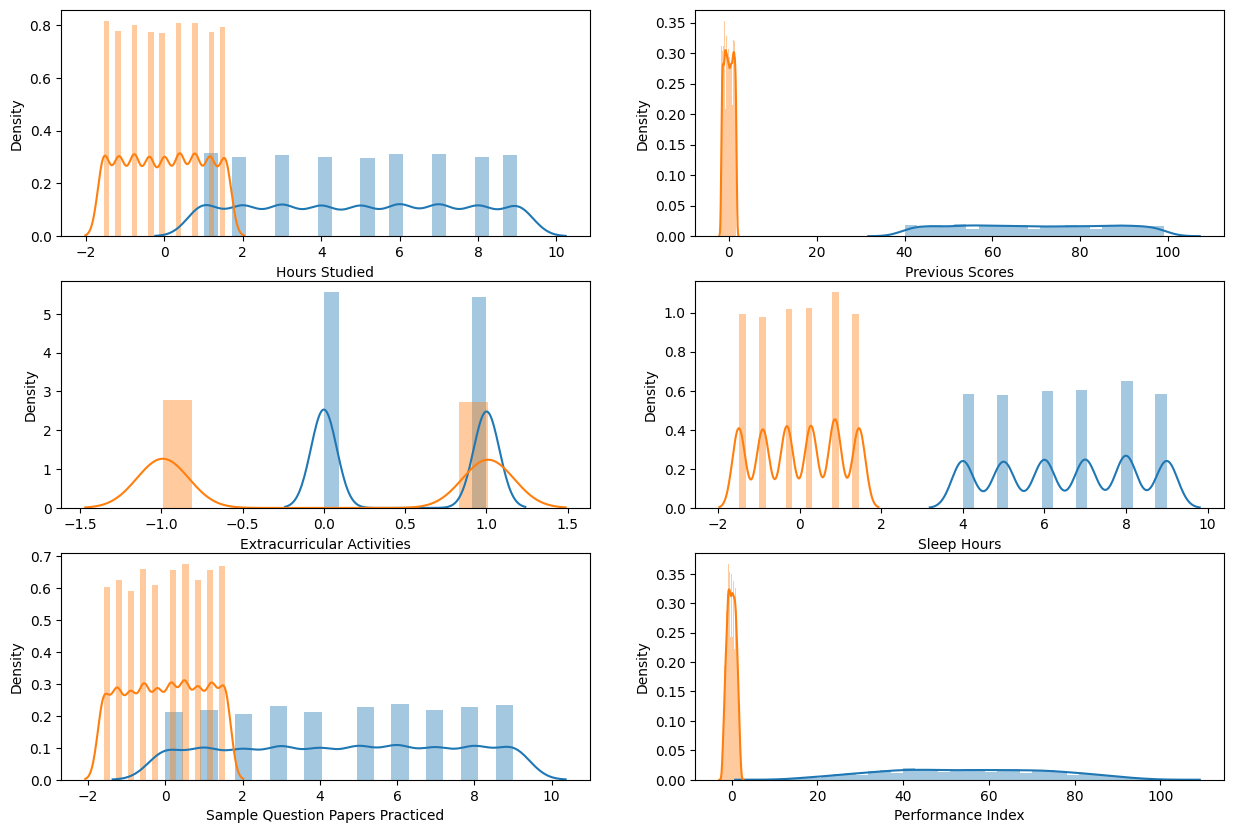

In [22]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

sns.distplot(student["Hours Studied"], ax=axes[0, 0])
sns.distplot(scaled_student["Hours Studied"], ax=axes[0, 0])
sns.distplot(student["Previous Scores"], ax=axes[0, 1])
sns.distplot(scaled_student["Previous Scores"], ax=axes[0, 1])
sns.distplot(student["Extracurricular Activities"], ax=axes[1, 0])
sns.distplot(scaled_student["Extracurricular Activities"], ax=axes[1, 0])
sns.distplot(student["Sleep Hours"], ax=axes[1, 1])
sns.distplot(scaled_student["Sleep Hours"], ax=axes[1, 1])
sns.distplot(student["Sample Question Papers Practiced"], ax=axes[2, 0])
sns.distplot(scaled_student["Sample Question Papers Practiced"], ax=axes[2, 0])
sns.distplot(student["Performance Index"], ax=axes[2, 1])
sns.distplot(scaled_student["Performance Index"], ax=axes[2, 1])
plt.show()

Scaling data dalam analisis regresi digunakan untuk mengubah skala fitur atau variabel ke rentang yang seragam. Proses scaling ini penting untuk dilakukan, terutama ketika variabel dalam data memiliki satuan atau rentang nilai yang sangat berbeda.

# Membangun Model Regresi

Train Test Split

In [23]:
X = scaled_student.drop("Performance Index", axis=1).values
y = scaled_student["Performance Index"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [24]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  6911
Ukuran X test  2962
Ukuran y train  6911
Ukuran y test  2962


Dalam proses membangun model regresi atau model pembelajaran mesin lainnya, data biasanya dibagi menjadi dua bagian yaitu, data train (pelatihan) dan data test (pengujian).

Membangun Model dengan Package Statsmodels

In [25]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [26]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [27]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.229e+05
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:04:47   Log-Likelihood:                 5717.7
No. Observations:                6911   AIC:                        -1.142e+04
Df Residuals:                    6905   BIC:                        -1.138e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.386      0.6

In [28]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.9888924592729083
adjusted coefficient of determination: 0.988884416158696
regression coefficients: [4.91602316e-04 3.85188183e-01 9.19004962e-01 1.57677928e-02
 4.24791756e-02 2.90665229e-02]


In [30]:
# membuat list
list_columns = []

for i in student.columns:
  if i != "Performance Index":
    list_columns.append(i)

In [31]:
list_columns

['Hours Studied',
 'Previous Scores',
 'Extracurricular Activities',
 'Sleep Hours',
 'Sample Question Papers Practiced']

In [32]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1
df_statsmod.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,actual_price,prediction_price
0,0.775566,0.551749,1.010078,1.454025,1.540603,0.977912,0.928763
1,0.003052,-1.468485,-0.990022,-0.313179,-1.598505,-1.312848,-1.423255
2,0.003052,-0.948996,1.010078,0.275889,0.843023,-0.792220,-0.818315
3,-0.769462,1.071238,-0.990022,-0.902247,-0.552136,0.665536,0.618591
4,0.389309,0.205423,1.010078,0.275889,-1.249715,0.405222,0.330555


Uji Distribusi Residual

Uji distribusi residual dalam analisis regresi bertujuan untuk mengevaluasi apakah residual (selisih antara nilai yang diamati dan nilai yang diprediksi oleh model) mengikuti distribusi tertentu, biasanya distribusi normal. Dalam regresi linear, asumsi utama adalah bahwa residual berdistribusi normal dengan rata-rata nol. Memeriksa distribusi residual ini penting untuk dilakukan karena dapat mempengaruhi validitas inferensi statistik, seperti uji signifikansi dan keakuratan prediksi model.

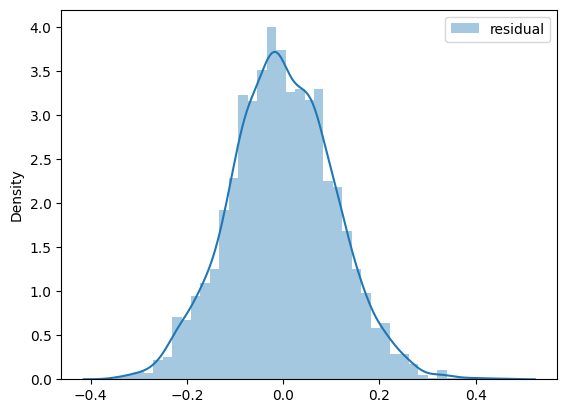

In [33]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [34]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.999, p=0.046
Tolak H0, residual tidak berdistribusi normal


In [35]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,actual_price,prediction_price,residual
0,0.775566,0.551749,1.010078,1.454025,1.540603,0.977912,0.928763,0.049150
1,0.003052,-1.468485,-0.990022,-0.313179,-1.598505,-1.312848,-1.423255,0.110407
2,0.003052,-0.948996,1.010078,0.275889,0.843023,-0.792220,-0.818315,0.026095
3,-0.769462,1.071238,-0.990022,-0.902247,-0.552136,0.665536,0.618591,0.046945
4,0.389309,0.205423,1.010078,0.275889,-1.249715,0.405222,0.330555,0.074668


<function matplotlib.pyplot.show(close=None, block=None)>

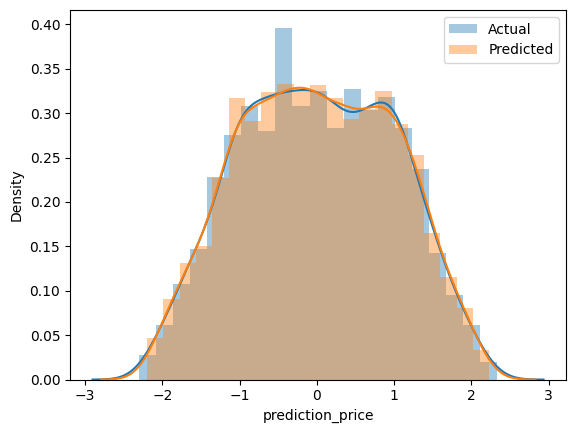

In [36]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_price'], label="Actual")
sns.distplot(df_statsmod['prediction_price'], label="Predicted")
plt.legend()
plt.show

Grafik tersebut menunjukkan perbandingan distribusi antara nilai aktual dan nilai prediksi dari model regresi, dengan sumbu x merepresentasikan harga prediksi yang telah dinormalisasi atau diskalakan, dan sumbu y menunjukkan kepadatan distribusi (density). Grafik memperlihatkan overlay distribusi nilai aktual (biru) dan nilai prediksi (oranye), di mana kesesuaian distribusi ini menunjukkan bahwa model mampu memprediksi nilai dengan cukup akurat.

Distribusi yang berbentuk lonceng (bell-shaped curve) mengindikasikan bahwa residual (perbedaan antara nilai aktual dan prediksi) mengikuti distribusi normal, di mana indukasi ini penting untuk validitas asumsi normalitas dalam model regresi. Hal ini menunjukkan bahwa model dapat bekerja dengan baik, meskipun evaluasi tambahan, seperti nilai R-squared atau error metrics, tetap diperlukan untuk memahami akurasi prediksi secara kuantitatif.

In [37]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

2.007577745446734

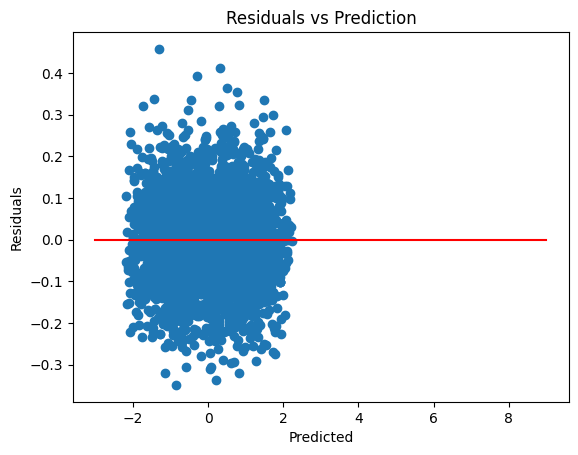

In [39]:
asm_homosk = plt.scatter(df_statsmod['prediction_price'], df_statsmod["residual"])
plt.xlabel('Predicted')
plt.ylabel('Residuals')
asm_homosk = sns.lineplot(x=[-3,9], y=[0,0], color='red')
asm_homosk = plt.title('Residuals vs Prediction')

Grafik residual vs prediksi menunjukkan hubungan antara residual (sisa prediksi) dan nilai prediksi, dengan sumbu x mewakili nilai prediksi dan sumbu y menunjukkan residual, atau selisih antara nilai aktual dan nilai prediksi.

Garis merah horizontal pada nilai nol menjadi acuan penyebaran residu. Distribusi residual yang tampak acak dan seimbang di sekitar garis menunjukkan bahwa model regresi memiliki asumsi linearitas yang terpenuhi dan tidak ada pola sistematik dalam kesalahan prediksi, menandakan hubungan linear yang cukup baik antara variabel input dan output. Tidak adanya pola tertentu dalam penyebaran residual juga menunjukkan bahwa model tidak mengalami masalah seperti non-linearitas atau heteroskedastisitas. Sebagian besar titik residu berada dekat dengan garis merah, mengindikasikan akurasi prediksi yang cukup baik, meskipun ada beberapa outlier atau kesalahan prediksi.

In [40]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_price'], df_statsmod['prediction_price']))

R-square : 0.9881722244958586


In [41]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MSE : 0.011616850730584124


In [48]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)

T-test score const:  0.3861219699958413
T-test score X1:  301.713522526501
T-test score X2:  723.1780520903272
T-test score X3:  12.380001028722404
T-test score X4:  33.319309957208326
T-test score X5:  22.826068935573172


In [49]:
p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)

P-value const:  0.6994182357698595
P-value X1:  0.0
P-value X2:  0.0
P-value X3:  7.838157242299875e-35
P-value X4:  7.309701352650373e-226
P-value X5:  3.0457028817242438e-111


In [45]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  122948.95151047994
P-value :  0.0
Tolak H0
